In [1]:

import pandas as pd             # data package
import matplotlib.pyplot as plt # graphics 
import sys                      # system module, used to get Python version 
import os                       # operating system tools (check files)
import datetime as dt           # date tools, used to note current date  
import openpyxl as op
import numpy as np

# these are new 
import requests, io             # internet and input tools  
from bs4 import BeautifulSoup   # website parsing

%matplotlib inline 

print('\nPython version: ', sys.version) 
print('Pandas version: ', pd.__version__)
print('Requests version: ', requests.__version__)
print("Today's date:", dt.date.today())



Python version:  3.5.2 |Anaconda custom (x86_64)| (default, Jul  2 2016, 17:52:12) 
[GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]
Pandas version:  0.20.1
Requests version:  2.13.0
Today's date: 2017-05-16


# About the Project


##### In 2001, Jim O’Neill, the Chief Economist at Goldman Sachs, invented the BRICs: an index of the four emerging economies that would overtake the six largest western economies in size and influence by 2032. In a later paper, he used the same metrics to predict the “Next 11” emerging economies after the BRICs. These papers influence investment in emerging economies to this day, and, thanks to a wide new array of indices like the Doing Business report and the Global Competitiveness index (GCI), are now replicable. 

#####     O’Neill looked at 13 variables to predict strong emerging economies: Inflation, Deficit as % of GDP, External Debt as % of GDP, Investment Rates, Openness of the Economy, Penetration of Phones, Penetration of PCs, Penetration of Internet, Life Expectancy, Political Stability, Rule of Law, and Corruption. 

#####    I created my own index of up-and-coming emerging economies using a similar process. I compiled a data frame of the Doing Business’s ten most predictive variables ('Starting a Business',  'Dealing with Construction Permits',  'Getting Electricity',  'Registering Property',  'Getting Credit',  'Protecting Minority Investors',  'Paying Taxes',  'Trading Across Borders',  'Enforcing Contracts' and 'Resolving Insolvency'), controlling for the GCI’s top and bottom 50 performers.  That filters out economies that are too developed for the purposes of this excersize, and those do not yet have the adequate infrastructure to support investment in spite of strong variable growth. 

#####     I then created a separate data frame of the annual rate of change of each of those variables per country. To compare these across the board, I took the sum of each country’s average % change over 10 years for each variable, and created a data frame of those aggregate numbers. I chose to compare rates of change as an indicator of which countries' institututions will become stronger in the next 20 years. Strength in institutions is the best predictor of economic growth, and the strongest attractor of FDI.

#####    Finally, I compared the rates of change on an annual basis for the top 15 countries. I found that all growth slowed significantly in 2015, and that the top performers were Rwanda and Khazakstan. Rwanda has experienced 6% annual GDP growth over the past 10 years, while Khazakstan has only seen 1-2%. Based on the current trends that I identified, we should see an upturn in the GDP of all 15 top countries if their institutional investments pay off. 

# Step 1: Compiling the Data

## Doing Business Report Key Indicators 

In [41]:
path = '/Users/zoeseward/Desktop/DoingBusiness.csv'

df = pd.read_csv(path, encoding='latin1')

In [42]:
col_list = ['Economy',
 'Year','Starting a business-DTF','Dealing with Construction Permits-DTF', 'Getting Electricity-DTF','Registering Property-DTF','Getting Credit-DTF','Protecting Minority Investors-DTF','Paying Taxes-DTF', 'Trading Across Borders-DTF', 'Enforcing Contracts-DTF','Resolving Insolvency-DTF']
df = df[col_list] 

In [43]:
df=df.rename(columns = {'Economy':'Country',
                        'Starting a business-DTF':'Starting a Business',
                        'Dealing with Construction Permits-DTF':'Dealing with Construction Permits',
                        'Getting Electricity-DTF':'Getting Electricity',
                        'Registering Property-DTF':'Registering Property',
                        'Getting Credit-DTF':'Getting Credit',
                        'Protecting Minority Investors-DTF':'Protecting Minority Investors',
                        'Paying Taxes-DTF':'Paying Taxes', 
                        'Trading Across Borders-DTF':'Trading Across Borders', 
                        'Enforcing Contracts-DTF':'Enforcing Contracts',
                        'Resolving Insolvency-DTF':'Resolving Insolvency'})

In [44]:
df['Year'] = df['Year'].map(lambda x: x.lstrip('DB'))

In [45]:
df=df.replace(' ',np.nan,regex=True)

In [46]:
df['Dealing with Construction Permits']=df['Dealing with Construction Permits'].astype(float)

In [47]:
df['Year']=df['Year'].astype(int)

In [48]:
df['Getting Electricity']=df['Getting Electricity'].astype(float)

In [49]:
df['Registering Property']=df['Registering Property'].astype(float)

In [50]:
df['Getting Credit']=df['Getting Credit'].astype(float)

In [51]:
df['Protecting Minority Investors']=df['Protecting Minority Investors'].astype(float)

In [52]:
df['Paying Taxes']=df['Paying Taxes'].astype(float)

In [53]:
df['Trading Across Borders']=df['Trading Across Borders'].astype(float)

In [54]:
df['Country']=df['Country'].astype(str)

In [55]:
df=df.sort_values(['Country','Year'], axis=0, ascending=True, inplace=False)

In [56]:
df=df[df['Year'].map(int) >= 2006]

In [65]:
df.head()

,Country,Year,Starting a Business,Dealing with Construction Permits,Getting Electricity,Registering Property,Getting Credit,Protecting Minority Investors,Paying Taxes,Trading Across Borders,...,Starting a Business Annual Change,Dealing with Construction Permits Annual Change,Getting Electricity Annual Change,Registering Property Annual Change,Getting Credit Annual Change,Protecting Minority Investors Annual Change,Paying Taxes Annual Change,Trading Across Borders Annual Change,Enforcing Contracts Annual Change,Resolving Insolvency Annual Change
9,Afghanistan,2008,82.01,23.92,NaN,28.89,6.25,10.0,73.91,20.65,...,-0.025662,0.0,NaN,0.238320,0.0,0.0,-0.022096,0.088561,0.0,inf
8,Afghanistan,2009,85.16,23.92,NaN,28.89,6.25,10.0,73.91,20.47,...,0.038410,0.0,NaN,0.000000,0.0,0.0,0.000000,-0.008717,0.0,-0.033617
7,Afghanistan,2010,89.32,23.92,58.57,35.56,37.50,10.0,73.91,17.71,...,0.048849,0.0,NaN,0.230876,5.0,0.0,0.000000,-0.134831,0.0,0.000000
6,Afghanistan,2011,89.75,23.92,37.66,33.33,37.50,10.0,73.91,11.26,...,0.004814,0.0,-0.357009,-0.062711,0.0,0.0,0.000000,-0.364201,0.0,0.070336
5,Afghanistan,2012,89.87,23.92,57.41,33.33,37.50,10.0,73.91,14.10,...,0.001337,0.0,0.524429,0.000000,0.0,0.0,0.000000,0.252220,0.0,0.017500


# Step 2: Creating a New DataFrame 

## Rate of Change

In [57]:
d2=df.drop('Country',axis=1)

In [58]:
d2=d2.pct_change(periods=1, fill_method='pad', limit=None)

In [59]:
d2=d2.rename(columns = {'Starting a Business':'Starting a Business Annual Change',
 'Dealing with Construction Permits':'Dealing with Construction Permits Annual Change',
 'Getting Electricity':'Getting Electricity Annual Change',
 'Registering Property':'Registering Property Annual Change',
 'Getting Credit':'Getting Credit Annual Change',
 'Protecting Minority Investors':'Protecting Minority Investors Annual Change',
 'Paying Taxes':'Paying Taxes Annual Change',
 'Trading Across Borders':'Trading Across Borders Annual Change',
 'Enforcing Contracts':'Enforcing Contracts Annual Change',
 'Resolving Insolvency':'Resolving Insolvency Annual Change'})
          

In [60]:
d2=d2.drop('Year',axis=1)

In [61]:
df=df.join(d2, on=None, how='left', lsuffix='', rsuffix='', sort=False)

In [62]:
df=df[df['Year'].map(int) >= 2008]

In [63]:
to_drop = ['Switzerland','Singapore','United States','Netherlands','Germany','Sweden','United Kingdom',
           'Japan','Hong Kong','Finland','Norway','Denmark','New Zealand','China',
           'Canada','United Arab Emirates','Belgium','Qatar','Austria','Luxembourg','France','Australia',
           'Ireland','Israel','Malaysia','South Korea','Iceland','China','Saudi Arabia','Estonia',
           'Czech Republic','Spain','Chile','Thailand','Lithuania','Poland','Azerbaijan','Kuwait',
           'India','Malta','Indonesia','Panama','Russian Federation','Italy','Mauritius','Portugal',
           'South Africa','Bahrain','Latvia','Bulgaria','Mexico','nan']
df=df[~df['Country'].isin(to_drop)]

In [64]:
df.head()

,Country,Year,Starting a Business,Dealing with Construction Permits,Getting Electricity,Registering Property,Getting Credit,Protecting Minority Investors,Paying Taxes,Trading Across Borders,...,Starting a Business Annual Change,Dealing with Construction Permits Annual Change,Getting Electricity Annual Change,Registering Property Annual Change,Getting Credit Annual Change,Protecting Minority Investors Annual Change,Paying Taxes Annual Change,Trading Across Borders Annual Change,Enforcing Contracts Annual Change,Resolving Insolvency Annual Change
9,Afghanistan,2008,82.01,23.92,NaN,28.89,6.25,10.0,73.91,20.65,...,-0.025662,0.0,NaN,0.238320,0.0,0.0,-0.022096,0.088561,0.0,inf
8,Afghanistan,2009,85.16,23.92,NaN,28.89,6.25,10.0,73.91,20.47,...,0.038410,0.0,NaN,0.000000,0.0,0.0,0.000000,-0.008717,0.0,-0.033617
7,Afghanistan,2010,89.32,23.92,58.57,35.56,37.50,10.0,73.91,17.71,...,0.048849,0.0,NaN,0.230876,5.0,0.0,0.000000,-0.134831,0.0,0.000000
6,Afghanistan,2011,89.75,23.92,37.66,33.33,37.50,10.0,73.91,11.26,...,0.004814,0.0,-0.357009,-0.062711,0.0,0.0,0.000000,-0.364201,0.0,0.070336
5,Afghanistan,2012,89.87,23.92,57.41,33.33,37.50,10.0,73.91,14.10,...,0.001337,0.0,0.524429,0.000000,0.0,0.0,0.000000,0.252220,0.0,0.017500


# Step 3: Breaking it Down By Country

In [66]:
Afghanistan=df.iloc[1:10]
Afghanistan

,Country,Year,Starting a Business,Dealing with Construction Permits,Getting Electricity,Registering Property,Getting Credit,Protecting Minority Investors,Paying Taxes,Trading Across Borders,...,Starting a Business Annual Change,Dealing with Construction Permits Annual Change,Getting Electricity Annual Change,Registering Property Annual Change,Getting Credit Annual Change,Protecting Minority Investors Annual Change,Paying Taxes Annual Change,Trading Across Borders Annual Change,Enforcing Contracts Annual Change,Resolving Insolvency Annual Change
8,Afghanistan,2009,85.16,23.92,NaN,28.89,6.25,10.00,73.91,20.47,...,0.038410,0.000000,NaN,0.000000,0.000000,0.000,0.000000,-0.008717,0.000000,-0.033617
7,Afghanistan,2010,89.32,23.92,58.57,35.56,37.50,10.00,73.91,17.71,...,0.048849,0.000000,NaN,0.230876,5.000000,0.000,0.000000,-0.134831,0.000000,0.000000
6,Afghanistan,2011,89.75,23.92,37.66,33.33,37.50,10.00,73.91,11.26,...,0.004814,0.000000,-0.357009,-0.062711,0.000000,0.000,0.000000,-0.364201,0.000000,0.070336
5,Afghanistan,2012,89.87,23.92,57.41,33.33,37.50,10.00,73.91,14.10,...,0.001337,0.000000,0.524429,0.000000,0.000000,0.000,0.000000,0.252220,0.000000,0.017500
4,Afghanistan,2013,90.28,23.92,58.92,33.33,37.50,10.00,73.91,16.97,...,0.004562,0.000000,0.026302,0.000000,0.000000,0.000,0.000000,0.203546,0.000000,-0.002457
3,Afghanistan,2014,93.27,24.30,59.67,33.33,43.75,10.00,74.39,10.76,...,0.033119,0.015886,0.012729,0.000000,0.166667,0.000,0.006494,-0.365940,0.036174,-0.168895
2,Afghanistan,2015,92.68,22.39,45.63,27.50,45.00,11.67,74.04,28.90,...,-0.006326,-0.078601,-0.235294,-0.174917,0.028571,0.167,-0.004705,1.685874,0.128231,-0.000847
1,Afghanistan,2016,92.19,22.39,45.51,27.50,45.00,11.67,55.64,28.90,...,-0.005287,0.000000,-0.002630,0.000000,0.000000,0.000,-0.248514,0.000000,-0.055043,0.000847
0,Afghanistan,2017,92.08,22.39,45.04,27.50,45.00,11.67,51.29,30.63,...,-0.001193,0.000000,-0.010327,0.000000,0.000000,0.000,-0.078181,0.059862,0.000000,0.000000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x11d66ecc0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11dee6e10>], dtype=object)

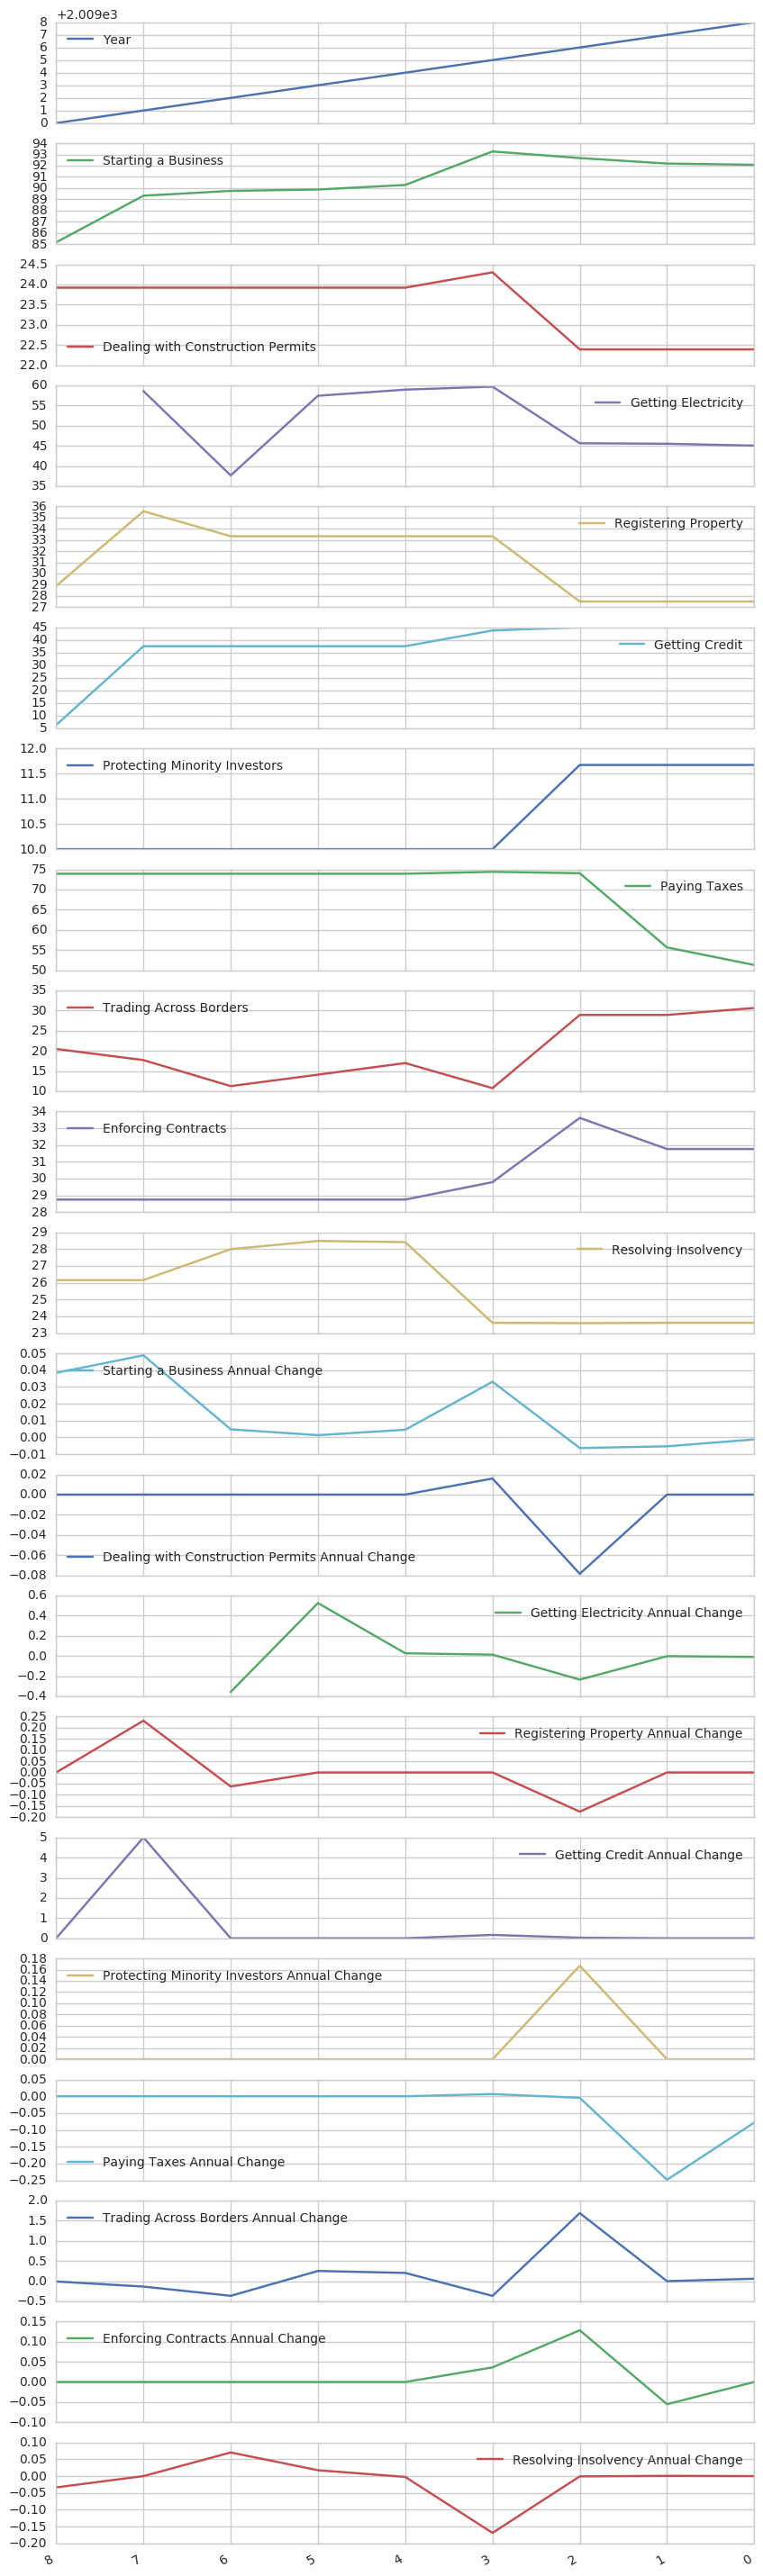

In [67]:
import matplotlib
import seaborn as sns
sns.set_style("whitegrid")
Afghanistan.plot(subplots=True,figsize=(10,40))

In [68]:
sum( Afghanistan [['Starting a Business Annual Change',
 'Dealing with Construction Permits Annual Change',
 'Getting Electricity Annual Change',
 'Registering Property Annual Change',
 'Getting Credit Annual Change',
 'Protecting Minority Investors Annual Change',
 'Paying Taxes Annual Change',
 'Trading Across Borders Annual Change',
 'Enforcing Contracts Annual Change',
 'Resolving Insolvency Annual Change']].mean(axis=1))

0.6935612350429966

### Repeated for Every Country...

# Step 4: New DataFrame of New Indicators

## The Sum of Average Growth Rates Over 10 Years and 10 Indicators for All Countries 

In [3]:
indicator={'Afghanistan':0.6935612350429966, 'Albania': 0,
 'Algeria':-0.00092285897216760893,
 'Angola':0.051252762326626698,
 'Argentina':0.13999459671544395,
 'Armenia':0.22340618756288891,
 'Bangladesh':-0.10258298519888757,
 'Barbados':-0.082963181174153383,
 'Belarus':0,
 'Belize':-0.041873978192264114,
 'Benin':0.29309240576723328,
 'Bhutan':0.39239735187582425,
 'Bolivia':0.044927585329123235,
 'Botswana':0.12663815444048271,
 'Brazil':0.30200697013716771,
 'Burundi':0.61853823057908197,
 'Cambodia':0,
 'Cameroon':0.28145364654716665,
 'Chad':0,
 'Colombia':0.38316161542610783,
 'Comoros':0.19010799668247047,
 'Croatia':0.51083023755235524,
 'Cyprus':0.032935620306650572,
 'Djibouti':0.11214833993512356,
 'Dominica':0.064306962823139691,
 'Ecuador':0.054546536908037811,
 'Eritrea':0.039881142340442953,
 'Ethiopia':0.15395635132719246,
 'Fiji':-0.093388065648656537,
 'Gabon':0.10596344297956363,
 'Georgia':0.37494234427171097,
 'Ghana':-0.0121790517138873,
 'Greece':0.20115392743882576,
 'Grenada':-0.070204543700137331,
 'Guatemala':0.14424010491983738,
 'Guinea':0.30065456555582376,
 'GuineaBissau':1.630926949702374,
 'Guyana':0.27797696529340038,
 'Haiti':0.000898055511520582,
 'Honduras':0.13018414293694475,
 'Hungary':0.16138908300778687,
 'Iraq':0.051368161730860742,
 'Jamaica':0.15720621624357661,
 'Jordan':0.013530513624706961,
 'Kazakhstan':1.1455818282536971,
 'Kenya':0.15301380979631918,
 'Kiribati':-0.19039544166321937,
 'Kosovo':0.28578409543571409,
 'Lebanon':0.12567787165093053,
 'Lesotho':0.29054498222818875,
 'Liberia':0.11795282945358923,
 'Libya':-0.16075049037368921,
 'Madagascar':0.17793089030403286,
 'Malawi':0.39168081858245352,
 'Maldives':0,
 'Mali':0.42149662621258693,
 'Mauritania':0.26897761811259924,
 'Moldova':0.29701158769329844,
 'Mongolia':0.35889593864424535,
 'Montenegro':0.3986930267883963,
 'Morocco':0.3986930267883963,
 'Mozambique':0.069518020937512109,
 'Myanmar':0.21032828511171764,
 'Namibia':0.0010021146834223564,
 'Nepal':0.080120587230437176,
 'Nicaragua':0.025213023786210868,
 'Niger':0.53936434586122162,
 'Nigeria':0.054534436842349099,
 'Oman':0.092548558399797184,
 'Pakistan':0.023381946585084759,
 'Palau':0.65470778622467829,
 'Paraguay':0.10167008758621501,
 'Peru':0.13014770102015447,
 'Philippines':1.0155657127960913,
 'Romania':0.19251405360538873,
 'Rwanda':1.9884817095446534,
 'Samoa':0.087029830625160939,
 'Senegal':0.42629275328282418,
 'Serbia':0.46217511182356619,
 'Seychelles':0.21227409994393964,
 'Slovenia':0.26434836296441855,
 'Somalia':0,
 'Sudan':0.018524375952776069,
 'Suriname':0.38178310419342054,
 'Swaziland':0.13563518541660419,
 'Tajikistan':1.6747776656577369,
 'Tanzania':0.24374248099292628,
 'TimorLeste':0.46848345489738807,
 'Togo':0.39553729140457866,
 'Tonga':0.079063223401074981,
 'Tunisia':0.084388988143127022,
 'Turkey':0.097560775878298825,
 'Uganda':0.22113258272942699,
 'Ukraine':1.1270876983356628,
 'Uruguay':0.16132441679449119,
 'Uzbekistan':0,
 'Vanuatu':0.1574509878456361,
 'Vietnam':0.19305937045735175,
 'Zambia':0.19305937045735175,
 'Zimbabwe':47.997916485473141}
df1=pd.DataFrame.from_dict([indicator])

### Highest Rated Countries 

In [4]:
import heapq
from operator import itemgetter

top = dict(heapq.nlargest(30,indicator.items(), key=itemgetter(1)))
top

{'Afghanistan': 0.6935612350429966,
 'Benin': 0.2930924057672333,
 'Bhutan': 0.39239735187582425,
 'Brazil': 0.3020069701371677,
 'Burundi': 0.618538230579082,
 'Colombia': 0.3831616154261078,
 'Croatia': 0.5108302375523552,
 'Georgia': 0.37494234427171097,
 'Guinea': 0.30065456555582376,
 'GuineaBissau': 1.630926949702374,
 'Kazakhstan': 1.1455818282536971,
 'Lesotho': 0.29054498222818875,
 'Malawi': 0.3916808185824535,
 'Mali': 0.42149662621258693,
 'Moldova': 0.29701158769329844,
 'Mongolia': 0.35889593864424535,
 'Montenegro': 0.3986930267883963,
 'Morocco': 0.3986930267883963,
 'Niger': 0.5393643458612216,
 'Palau': 0.6547077862246783,
 'Philippines': 1.0155657127960913,
 'Rwanda': 1.9884817095446534,
 'Senegal': 0.4262927532828242,
 'Serbia': 0.4621751118235662,
 'Suriname': 0.38178310419342054,
 'Tajikistan': 1.674777665657737,
 'TimorLeste': 0.4684834548973881,
 'Togo': 0.39553729140457866,
 'Ukraine': 1.1270876983356628,
 'Zimbabwe': 47.99791648547314}

In [5]:
df2=pd.DataFrame.from_dict([top])
df2

,Afghanistan,Benin,Bhutan,Brazil,Burundi,Colombia,Croatia,Georgia,Guinea,GuineaBissau,...,Philippines,Rwanda,Senegal,Serbia,Suriname,Tajikistan,TimorLeste,Togo,Ukraine,Zimbabwe
0,0.693561,0.293092,0.392397,0.302007,0.618538,0.383162,0.51083,0.374942,0.300655,1.630927,...,1.015566,1.988482,0.426293,0.462175,0.381783,1.674778,0.468483,0.395537,1.127088,47.997916


### Highest Rated Countries Controlled for Sub-100 Ranked in the Global Competitiveness Index  

In [6]:
del df2['Zimbabwe']

In [14]:
del df2['Afghanistan']

In [15]:
del df2['Benin']

In [16]:
del df2['Burundi']

In [17]:
del df2['Lesotho']

In [18]:
del df2['Malawi']

In [19]:
del df2['Mali']

In [20]:
del df2['Niger']

In [21]:
del df2['Palau']

In [22]:
del df2['Suriname']

In [23]:
del df2['TimorLeste']

In [24]:
del df2['Togo']

In [27]:
del df2['GuineaBissau']

In [69]:
del df2 ['Montenegro']

In [70]:
df2

,Bhutan,Brazil,Colombia,Croatia,Georgia,Guinea,Kazakhstan,Moldova,Mongolia,Morocco,Philippines,Rwanda,Senegal,Serbia,Tajikistan,Ukraine
0,0.392397,0.302007,0.383162,0.51083,0.374942,0.300655,1.145582,0.297012,0.358896,0.398693,1.015566,1.988482,0.426293,0.462175,1.674778,1.127088


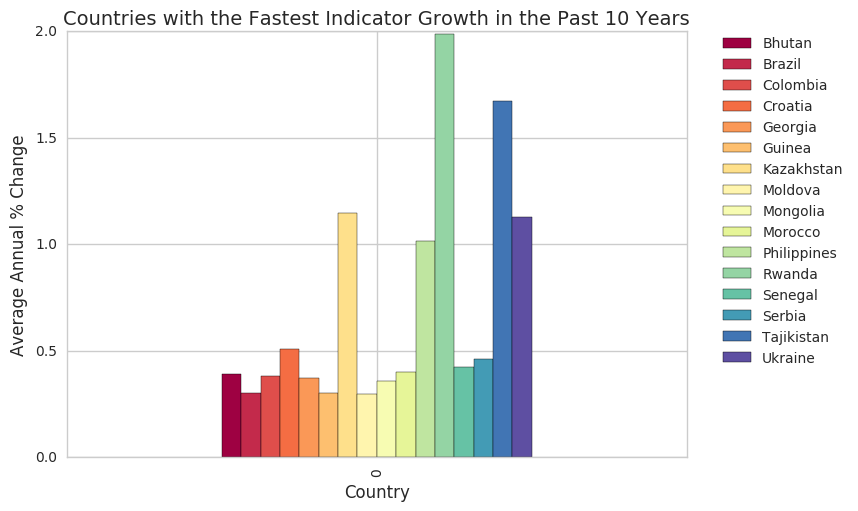

In [220]:
import seaborn as sns
sns.set_style('whitegrid')
fig, ax = plt.subplots()  
df2.plot(ax=ax,kind='bar',colormap='Spectral')
ax.set_title('Countries with the Fastest Indicator Growth in the Past 10 Years', fontsize=14)
ax.set_xlabel('Country', fontsize=12)
ax.set_ylabel('Average Annual % Change', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [113]:
list(df2.columns)

['Bhutan',
 'Brazil',
 'Colombia',
 'Croatia',
 'Georgia',
 'Guinea',
 'Kazakhstan',
 'Moldova',
 'Mongolia',
 'Morocco',
 'Philippines',
 'Rwanda',
 'Senegal',
 'Serbia',
 'Tajikistan',
 'Ukraine']

# Step 5: Comparing the Top 15

In [151]:
Bhutan=df.iloc[106:115]
Bhutan

,Country,Year,Starting a Business,Dealing with Construction Permits,Getting Electricity,Registering Property,Getting Credit,Protecting Minority Investors,Paying Taxes,Trading Across Borders,...,Starting a Business Annual Change,Dealing with Construction Permits Annual Change,Getting Electricity Annual Change,Registering Property Annual Change,Getting Credit Annual Change,Protecting Minority Investors Annual Change,Paying Taxes Annual Change,Trading Across Borders Annual Change,Enforcing Contracts Annual Change,Resolving Insolvency Annual Change
258,Bhutan,2008,76.67,61.75,NaN,68.82,37.50,46.67,84.53,43.50,...,0.102372,0.050706,NaN,0.000000,0.000000,0.000000,0.000000,0.018497,0.000000,NaN
257,Bhutan,2009,77.37,62.64,NaN,68.82,37.50,46.67,84.53,43.34,...,0.009130,0.014413,NaN,0.000000,0.000000,0.000000,0.000000,-0.003678,0.019948,NaN
256,Bhutan,2010,77.42,62.88,73.82,68.82,37.50,46.67,84.53,44.14,...,0.000646,0.003831,1.181442,0.000000,0.000000,0.000000,0.000000,0.018459,0.000000,NaN
255,Bhutan,2011,77.52,63.29,74.28,68.82,37.50,46.67,84.53,37.11,...,0.001292,0.006520,0.006231,0.000000,0.000000,0.000000,0.000000,-0.159266,0.000000,NaN
254,Bhutan,2012,80.28,63.28,74.27,68.82,62.50,46.67,84.53,38.30,...,0.035604,-0.000158,-0.000135,0.000000,0.666667,0.000000,0.000000,0.032067,0.000000,NaN
253,Bhutan,2013,80.28,63.59,76.21,68.82,62.50,46.67,84.53,40.51,...,0.000000,0.004899,0.026121,0.000000,0.000000,0.000000,0.000000,0.057702,0.000000,NaN
252,Bhutan,2014,81.69,64.09,76.76,68.82,68.75,46.67,85.50,40.77,...,0.017564,0.007863,0.007217,0.000000,0.100000,0.000000,0.011475,0.006418,0.000000,NaN
251,Bhutan,2015,85.54,68.31,78.90,71.61,50.00,48.33,85.50,94.25,...,0.047129,0.065845,0.027879,0.040541,-0.272727,0.035569,0.000000,1.311749,-0.066952,NaN
250,Bhutan,2016,85.57,68.40,80.09,73.40,50.00,48.33,88.11,94.25,...,0.000351,0.001318,0.015082,0.024997,0.000000,0.000000,0.030526,0.000000,0.000000,NaN


In [112]:
 Bhutandf=Bhutan[['Starting a Business Annual Change',
 'Dealing with Construction Permits Annual Change',
 'Getting Electricity Annual Change',
 'Registering Property Annual Change',
 'Getting Credit Annual Change',
 'Protecting Minority Investors Annual Change',
 'Paying Taxes Annual Change',
 'Trading Across Borders Annual Change',
 'Enforcing Contracts Annual Change',
 'Resolving Insolvency Annual Change']].mean(axis=1)
Bhutandf

258    0.021447
257    0.004977
256    0.133820
255   -0.016136
254    0.081561
253    0.009858
252    0.016726
251    0.132115
250    0.008030
dtype: float64

In [74]:
Brazil=df.iloc[136:145]

In [95]:
Brazildf=Brazil[['Starting a Business Annual Change',
 'Dealing with Construction Permits Annual Change',
 'Getting Electricity Annual Change',
 'Registering Property Annual Change',
 'Getting Credit Annual Change',
 'Protecting Minority Investors Annual Change',
 'Paying Taxes Annual Change',
 'Trading Across Borders Annual Change',
 'Enforcing Contracts Annual Change',
 'Resolving Insolvency Annual Change']].mean(axis=1)

In [75]:
Colombia=df.iloc[186:195]

In [96]:
Colombiadf=Colombia[['Starting a Business Annual Change',
 'Dealing with Construction Permits Annual Change',
 'Getting Electricity Annual Change',
 'Registering Property Annual Change',
 'Getting Credit Annual Change',
 'Protecting Minority Investors Annual Change',
 'Paying Taxes Annual Change',
 'Trading Across Borders Annual Change',
 'Enforcing Contracts Annual Change',
 'Resolving Insolvency Annual Change']].mean(axis=1)

In [76]:
Croatia=df.iloc[206:215]

In [97]:
Croatiadf=Croatia[['Starting a Business Annual Change',
 'Dealing with Construction Permits Annual Change',
 'Getting Electricity Annual Change',
 'Registering Property Annual Change',
 'Getting Credit Annual Change',
 'Protecting Minority Investors Annual Change',
 'Paying Taxes Annual Change',
 'Trading Across Borders Annual Change',
 'Enforcing Contracts Annual Change',
 'Resolving Insolvency Annual Change']].mean(axis=1)

In [83]:
Georgia=df.iloc[296:305]

In [98]:
Georgiadf=Georgia[['Starting a Business Annual Change',
 'Dealing with Construction Permits Annual Change',
 'Getting Electricity Annual Change',
 'Registering Property Annual Change',
 'Getting Credit Annual Change',
 'Protecting Minority Investors Annual Change',
 'Paying Taxes Annual Change',
 'Trading Across Borders Annual Change',
 'Enforcing Contracts Annual Change',
 'Resolving Insolvency Annual Change']].mean(axis=1)

In [77]:
Guinea=df.iloc[346:355]

In [99]:
Guineadf=Guinea[['Starting a Business Annual Change',
 'Dealing with Construction Permits Annual Change',
 'Getting Electricity Annual Change',
 'Registering Property Annual Change',
 'Getting Credit Annual Change',
 'Protecting Minority Investors Annual Change',
 'Paying Taxes Annual Change',
 'Trading Across Borders Annual Change',
 'Enforcing Contracts Annual Change',
 'Resolving Insolvency Annual Change']].mean(axis=1)

In [78]:
Kazakhstan=df.iloc[436:445]

In [100]:
Kazakhstandf=Kazakhstan[['Starting a Business Annual Change',
 'Dealing with Construction Permits Annual Change',
 'Getting Electricity Annual Change',
 'Registering Property Annual Change',
 'Getting Credit Annual Change',
 'Protecting Minority Investors Annual Change',
 'Paying Taxes Annual Change',
 'Trading Across Borders Annual Change',
 'Enforcing Contracts Annual Change',
 'Resolving Insolvency Annual Change']].mean(axis=1)

In [79]:
Moldova=df.iloc[559:568]

In [101]:
Moldovadf=Moldova[['Starting a Business Annual Change',
 'Dealing with Construction Permits Annual Change',
 'Getting Electricity Annual Change',
 'Registering Property Annual Change',
 'Getting Credit Annual Change',
 'Protecting Minority Investors Annual Change',
 'Paying Taxes Annual Change',
 'Trading Across Borders Annual Change',
 'Enforcing Contracts Annual Change',
 'Resolving Insolvency Annual Change']].mean(axis=1)

In [80]:
Mongolia=df.iloc[569:578]

In [102]:
Mongoliadf=Mongolia[['Starting a Business Annual Change',
 'Dealing with Construction Permits Annual Change',
 'Getting Electricity Annual Change',
 'Registering Property Annual Change',
 'Getting Credit Annual Change',
 'Protecting Minority Investors Annual Change',
 'Paying Taxes Annual Change',
 'Trading Across Borders Annual Change',
 'Enforcing Contracts Annual Change',
 'Resolving Insolvency Annual Change']].mean(axis=1)

In [81]:
Morocco=df.iloc[589:598]

In [103]:
Moroccodf=Morocco[['Starting a Business Annual Change',
 'Dealing with Construction Permits Annual Change',
 'Getting Electricity Annual Change',
 'Registering Property Annual Change',
 'Getting Credit Annual Change',
 'Protecting Minority Investors Annual Change',
 'Paying Taxes Annual Change',
 'Trading Across Borders Annual Change',
 'Enforcing Contracts Annual Change',
 'Resolving Insolvency Annual Change']].mean(axis=1)

In [82]:
Philippines=df.iloc[714:723]

In [127]:
Philippinesdf=Philippines[['Starting a Business Annual Change',
 'Dealing with Construction Permits Annual Change',
 'Getting Electricity Annual Change',
 'Registering Property Annual Change',
 'Getting Credit Annual Change',
 'Protecting Minority Investors Annual Change',
 'Paying Taxes Annual Change',
 'Trading Across Borders Annual Change',
 'Enforcing Contracts Annual Change',
 'Resolving Insolvency Annual Change']].mean(axis=1)

In [84]:
Rwanda=df.iloc[734:743]

In [104]:
Rwandadf=Rwanda[['Starting a Business Annual Change',
 'Dealing with Construction Permits Annual Change',
 'Getting Electricity Annual Change',
 'Registering Property Annual Change',
 'Getting Credit Annual Change',
 'Protecting Minority Investors Annual Change',
 'Paying Taxes Annual Change',
 'Trading Across Borders Annual Change',
 'Enforcing Contracts Annual Change',
 'Resolving Insolvency Annual Change']].mean(axis=1)

In [85]:
Senegal=df.iloc[754:763]

In [105]:
Senegaldf=Senegal[['Starting a Business Annual Change',
 'Dealing with Construction Permits Annual Change',
 'Getting Electricity Annual Change',
 'Registering Property Annual Change',
 'Getting Credit Annual Change',
 'Protecting Minority Investors Annual Change',
 'Paying Taxes Annual Change',
 'Trading Across Borders Annual Change',
 'Enforcing Contracts Annual Change',
 'Resolving Insolvency Annual Change']].mean(axis=1)

In [86]:
Serbia=df.iloc[764:773]

In [106]:
Serbiadf=Serbia[['Starting a Business Annual Change',
 'Dealing with Construction Permits Annual Change',
 'Getting Electricity Annual Change',
 'Registering Property Annual Change',
 'Getting Credit Annual Change',
 'Protecting Minority Investors Annual Change',
 'Paying Taxes Annual Change',
 'Trading Across Borders Annual Change',
 'Enforcing Contracts Annual Change',
 'Resolving Insolvency Annual Change']].mean(axis=1)

In [87]:
Tajikistan=df.iloc[825:835]

In [107]:
Tajikistandf=Tajikistan[['Starting a Business Annual Change',
 'Dealing with Construction Permits Annual Change',
 'Getting Electricity Annual Change',
 'Registering Property Annual Change',
 'Getting Credit Annual Change',
 'Protecting Minority Investors Annual Change',
 'Paying Taxes Annual Change',
 'Trading Across Borders Annual Change',
 'Enforcing Contracts Annual Change',
 'Resolving Insolvency Annual Change']].mean(axis=1)

In [88]:
Ukraine=df.iloc[906:915]

In [108]:
Ukrainedf=Ukraine[['Starting a Business Annual Change',
 'Dealing with Construction Permits Annual Change',
 'Getting Electricity Annual Change',
 'Registering Property Annual Change',
 'Getting Credit Annual Change',
 'Protecting Minority Investors Annual Change',
 'Paying Taxes Annual Change',
 'Trading Across Borders Annual Change',
 'Enforcing Contracts Annual Change',
 'Resolving Insolvency Annual Change']].mean(axis=1)

In [122]:
top15=['Bhutan',
 'Brazil',
 'Colombia',
 'Croatia',
 'Georgia',
 'Guinea',
 'Kazakhstan',
 'Moldova',
 'Mongolia',
 'Morocco',
 'Philippines',
 'Rwanda',
 'Senegal',
 'Serbia',
 'Tajikistan',
 'Ukraine']
for country in top15:
    print(country,':',country,'df', sep='')

Bhutan:Bhutandf
Brazil:Brazildf
Colombia:Colombiadf
Croatia:Croatiadf
Georgia:Georgiadf
Guinea:Guineadf
Kazakhstan:Kazakhstandf
Moldova:Moldovadf
Mongolia:Mongoliadf
Morocco:Moroccodf
Philippines:Philippinesdf
Rwanda:Rwandadf
Senegal:Senegaldf
Serbia:Serbiadf
Tajikistan:Tajikistandf
Ukraine:Ukrainedf


In [128]:
print ('Bhutan',Bhutandf,
'Brazil',Brazildf,
'Colombia',Colombiadf,
'Croatia',Croatiadf,
'Georgia',Georgiadf,
'Guinea',Guineadf,
'Kazakhstan',Kazakhstandf,
'Moldova',Moldovadf,
'Mongolia',Mongoliadf,
'Morocco',Moroccodf,
'Philippines',Philippinesdf,
'Rwanda',Rwandadf,
'Senega',Senegaldf,
'Serbia',Serbiadf,
'Tajikistan',Tajikistandf,
'Ukraine',Ukrainedf)

Bhutan 258    0.021447
257    0.004977
256    0.133820
255   -0.016136
254    0.081561
253    0.009858
252    0.016726
251    0.132115
250    0.008030
dtype: float64 Brazil 314    0.011155
313    0.026930
312    0.069811
311   -0.005724
310    0.003110
309   -0.009425
308    0.189966
307    0.038911
306   -0.022728
dtype: float64 Colombia 527    0.113970
526    0.114683
525    0.071555
524    0.020238
523    0.038293
522   -0.000256
521    0.014536
520    0.008793
519    0.001350
dtype: float64 Croatia 609    0.081999
608    0.042520
607    0.112977
606    0.013989
605    0.020562
604   -0.008862
603    0.089583
602    0.150819
601    0.007243
dtype: float64 Georgia 858    0.066593
857    0.196219
856    0.052521
855    0.037497
854    0.020825
853    0.011953
852   -0.053442
851    0.010392
850    0.032384
dtype: float64 Guinea 940    0.008304
939   -0.044315
938   -0.041689
937    0.119286
936    0.066544
935    0.203825
934   -0.048962
933    0.036384
932    0.001278
dtype: float64 

In [246]:
Bhutandict= {2008:0.021447,
    2009:0.004977,
    2010:0.133820,
    2011:-0.016136,
    2012:0.081561,
    2013:0.009858,
    2014:0.016726,
    2015:0.132115,
    2016:0.008030}

Brazildict={2008:0.011155,
    2009:0.026930,
    2010:0.069811,
    2011:-0.005724,
    2012:0.003110,
    2013:-0.009425,
    2014:0.189966,
    2015:0.038911,
    2016:-0.022728}

Colombiadict={2008:0.113970,
    2009:0.114683,
    2010:0.071555,
    2011:0.020238,
    2012:0.038293,
    2013:-0.000256,
    2014:0.014536,
    2015:0.008793,
    2016:0.001350}

Croatiadict={2008:0.081999,
    2009:0.042520,
    2010:0.112977,
    2011:0.013989,
    2012:0.020562,
    2013:-0.008862,
    2014:0.089583,
    2015:0.150819,
    2016:0.007243}

Georgiadict={2008:0.066593,
    2009:0.196219,
    2010:0.052521,
    2011:0.037497,
    2012:0.020825,
    2013:0.011953,
    2014:-0.053442,
    2015:0.010392,
    2016:0.032384}

Guineadict={2008:0.008304,
    2009:-0.044315,
    2010:-0.041689,
    2011:0.119286,
    2012:0.020825,
    2013:0.203825,
    2014:-0.048962,
    2015:0.036384,
    2016:0.001278}

Kazakhstandict={2008:0.048729,
    2009:0.131127,
    2010:0.146269,
    2011:0.080524,
    2012:-0.029872,
    2013:0.007446,
    2014:0.654782,
    2015:0.035615,
    2016:0.070961}

Moldovadict={2008:0.002311,
    2009:0.010242,
    2010:0.011407,
    2011:0.025669,
    2012:0.018171,
    2013:0.079894,
    2014:0.126810,
    2015:0.007189,
    2016:0.015318}

Mongoliadict={2008:0.026734,
    2009:0.014034,
    2010:-0.003917,
    2011:0.030982,
    2012:0.030594,
    2013:0.140158,
    2014:0.097233,
    2015:0.012136,
    2016:0.010942}

Moroccodict={2008:0.004986,
    2009:0.244239,
    2010:-0.009822,
    2011:0.081876,
    2012:-0.017827,
    2013:0.049230,
    2014:-0.014185,
    2015:0.024579,
    2016:0.035618}

Philippinesdict={2008:0.026734,
    2009:0.014034,
    2010:-0.003917,
    2011:0.030982,
    2012:0.030594,
    2013:0.140158,
    2014:0.097233,
    2015:0.012136,
    2016:0.010942}

Rwandadict={2008:0.162963,
    2009:0.508082,
    2010:0.034986,
    2011:0.006684,
    2012:0.093672,
    2013:1.153108,
    2014:-0.015600,
    2015:0.025979,
    2016:0.018607}

Senegaldict={2008:0.131993,
    2009:-0.052066,
    2010:0.004936,
    2011:0.099471,
    2012:0.007243,
    2013:0.069603,
    2014:0.023683,
    2015:0.121395,
    2016:0.020035}

Serbiadict={2008:-0.004626,
    2009:0.092919,
    2010:0.020482,
    2011:0.009547,
    2012:0.027372,
    2013:0.084411,
    2014:0.100629,
    2015:0.086797,
    2016:0.044644}

Tajikistandict={2008:0.062022,
    2009:0.099213,
    2010:0.066529,
    2011:0.089293,
    2012:-0.021178,
    2013:0.005779,
    2014:-0.005409,
    2015:0.062124,
    2016:0.034833}

Ukraineandict={2008:-0.061095,
    2009:0.007183,
    2010:0.325917,
    2011:0.008716,
    2012:0.183498,
    2013:0.578730,
    2014:0.051998,
    2015:0.011322,
    2016:0.020818}

In [247]:
df4=pd.DataFrame.from_dict([Bhutandict,Brazildict,Colombiadict,Croatiadict,Georgiadict,Guineadict,
                        Kazakhstandict,Moldovadict,Mongoliadict,Moroccodict,Philippinesdict,
                        Rwandadict,Senegaldict,Serbiadict,Tajikistandict,Ukraineandict])
df4

,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,0.021447,0.004977,0.133820,-0.016136,0.081561,0.009858,0.016726,0.132115,0.008030
1,0.011155,0.026930,0.069811,-0.005724,0.003110,-0.009425,0.189966,0.038911,-0.022728
2,0.113970,0.114683,0.071555,0.020238,0.038293,-0.000256,0.014536,0.008793,0.001350
3,0.081999,0.042520,0.112977,0.013989,0.020562,-0.008862,0.089583,0.150819,0.007243
4,0.066593,0.196219,0.052521,0.037497,0.020825,0.011953,-0.053442,0.010392,0.032384
5,0.008304,-0.044315,-0.041689,0.119286,0.020825,0.203825,-0.048962,0.036384,0.001278
6,0.048729,0.131127,0.146269,0.080524,-0.029872,0.007446,0.654782,0.035615,0.070961
7,0.002311,0.010242,0.011407,0.025669,0.018171,0.079894,0.126810,0.007189,0.015318
8,0.026734,0.014034,-0.003917,0.030982,0.030594,0.140158,0.097233,0.012136,0.010942
9,0.004986,0.244239,-0.009822,0.081876,-0.017827,0.049230,-0.014185,0.024579,0.035618


In [248]:
df4_new=df4.transpose()
df4_new

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
2008,0.021447,0.011155,0.113970,0.081999,0.066593,0.008304,0.048729,0.002311,0.026734,0.004986,0.026734,0.162963,0.131993,-0.004626,0.062022,-0.061095
2009,0.004977,0.026930,0.114683,0.042520,0.196219,-0.044315,0.131127,0.010242,0.014034,0.244239,0.014034,0.508082,-0.052066,0.092919,0.099213,0.007183
2010,0.133820,0.069811,0.071555,0.112977,0.052521,-0.041689,0.146269,0.011407,-0.003917,-0.009822,-0.003917,0.034986,0.004936,0.020482,0.066529,0.325917
2011,-0.016136,-0.005724,0.020238,0.013989,0.037497,0.119286,0.080524,0.025669,0.030982,0.081876,0.030982,0.006684,0.099471,0.009547,0.089293,0.008716
2012,0.081561,0.003110,0.038293,0.020562,0.020825,0.020825,-0.029872,0.018171,0.030594,-0.017827,0.030594,0.093672,0.007243,0.027372,-0.021178,0.183498
2013,0.009858,-0.009425,-0.000256,-0.008862,0.011953,0.203825,0.007446,0.079894,0.140158,0.049230,0.140158,1.153108,0.069603,0.084411,0.005779,0.578730
2014,0.016726,0.189966,0.014536,0.089583,-0.053442,-0.048962,0.654782,0.126810,0.097233,-0.014185,0.097233,-0.015600,0.023683,0.100629,-0.005409,0.051998
2015,0.132115,0.038911,0.008793,0.150819,0.010392,0.036384,0.035615,0.007189,0.012136,0.024579,0.012136,0.025979,0.121395,0.086797,0.062124,0.011322
2016,0.008030,-0.022728,0.001350,0.007243,0.032384,0.001278,0.070961,0.015318,0.010942,0.035618,0.010942,0.018607,0.020035,0.044644,0.034833,0.020818


In [249]:
df5=df4_new.rename(columns = {0:'Bhutan',1:'Brazil',2:'Colombia',
                  3:'Croatia',4:'Georgia',5:'Guinea',6:'Kazakhstan',
                  7:'Moldova',8:'Mongolia',9:'Morocco',10:'Philippines',11:'Rwanda',
                  12:'Senegal',13:'Serbia', 14:'Tajikistan', 15:'Ukraine'})
df5

,Bhutan,Brazil,Colombia,Croatia,Georgia,Guinea,Kazakhstan,Moldova,Mongolia,Morocco,Philippines,Rwanda,Senegal,Serbia,Tajikistan,Ukraine
2008,0.021447,0.011155,0.113970,0.081999,0.066593,0.008304,0.048729,0.002311,0.026734,0.004986,0.026734,0.162963,0.131993,-0.004626,0.062022,-0.061095
2009,0.004977,0.026930,0.114683,0.042520,0.196219,-0.044315,0.131127,0.010242,0.014034,0.244239,0.014034,0.508082,-0.052066,0.092919,0.099213,0.007183
2010,0.133820,0.069811,0.071555,0.112977,0.052521,-0.041689,0.146269,0.011407,-0.003917,-0.009822,-0.003917,0.034986,0.004936,0.020482,0.066529,0.325917
2011,-0.016136,-0.005724,0.020238,0.013989,0.037497,0.119286,0.080524,0.025669,0.030982,0.081876,0.030982,0.006684,0.099471,0.009547,0.089293,0.008716
2012,0.081561,0.003110,0.038293,0.020562,0.020825,0.020825,-0.029872,0.018171,0.030594,-0.017827,0.030594,0.093672,0.007243,0.027372,-0.021178,0.183498
2013,0.009858,-0.009425,-0.000256,-0.008862,0.011953,0.203825,0.007446,0.079894,0.140158,0.049230,0.140158,1.153108,0.069603,0.084411,0.005779,0.578730
2014,0.016726,0.189966,0.014536,0.089583,-0.053442,-0.048962,0.654782,0.126810,0.097233,-0.014185,0.097233,-0.015600,0.023683,0.100629,-0.005409,0.051998
2015,0.132115,0.038911,0.008793,0.150819,0.010392,0.036384,0.035615,0.007189,0.012136,0.024579,0.012136,0.025979,0.121395,0.086797,0.062124,0.011322
2016,0.008030,-0.022728,0.001350,0.007243,0.032384,0.001278,0.070961,0.015318,0.010942,0.035618,0.010942,0.018607,0.020035,0.044644,0.034833,0.020818


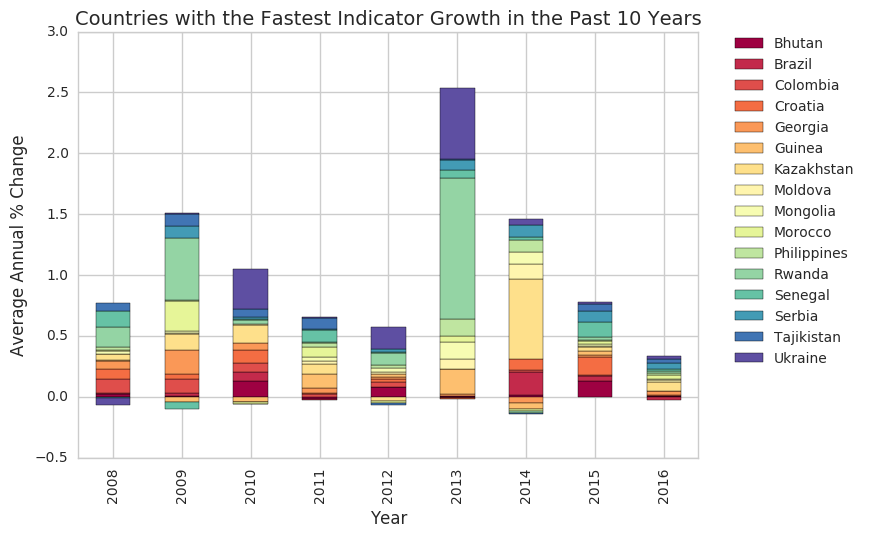

In [250]:
import seaborn as sns
sns.set_style('whitegrid')
fig, ax = plt.subplots()  
df5.plot(ax=ax,kind='bar',stacked=True, colormap='Spectral')
ax.set_title('Countries with the Fastest Indicator Growth in the Past 10 Years', fontsize=14)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Average Annual % Change', fontsize=12)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [251]:
df2

,Bhutan,Brazil,Colombia,Croatia,Georgia,Guinea,Kazakhstan,Moldova,Mongolia,Morocco,Philippines,Rwanda,Senegal,Serbia,Tajikistan,Ukraine
0,0.392397,0.302007,0.383162,0.51083,0.374942,0.300655,1.145582,0.297012,0.358896,0.398693,1.015566,1.988482,0.426293,0.462175,1.674778,1.127088


In [252]:
 del df5['Brazil']

In [253]:
del df5 ['Guinea']

In [254]:
del df5 ['Moldova']

In [255]:
del df5 ['Georgia']

In [256]:
del df5 ['Bhutan']

In [257]:
del df5 ['Morocco']

In [258]:
del df5 ['Mongolia']

In [259]:
del df5 ['Colombia']

In [260]:
del df5 ['Ukraine']

In [261]:
del df5 ['Philippines']

In [263]:
del df5 ['Serbia']

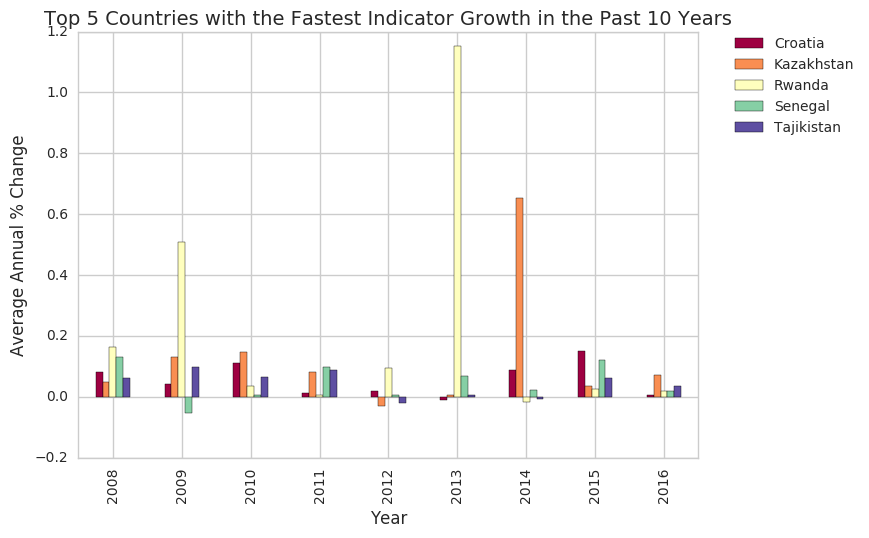

In [265]:
import seaborn as sns
sns.set_style('whitegrid')
fig, ax = plt.subplots()  
df5.plot(ax=ax,kind='bar',colormap='Spectral')
ax.set_title('Top 5 Countries with the Fastest Indicator Growth in the Past 10 Years', fontsize=14)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Average Annual % Change', fontsize=12)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
